<a href="https://colab.research.google.com/github/Hushpuppyzac/DLI-Assignment/blob/main/DLI_Grp_Asgmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import nbformat
from IPython import get_ipython
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

def run_notebook_from_github(url):
    print("🔄 Downloading notebook from GitHub...")
    try:
        response = requests.get(url)
        response.raise_for_status()
    except Exception as e:
        print(f"❌ Failed to download notebook: {e}")
        return None

    print("📖 Parsing notebook content...")
    try:
        notebook = nbformat.reads(response.text, as_version=4)
    except Exception as e:
        print(f"❌ Failed to parse notebook: {e}")
        return None

    ipython = get_ipython()
    if ipython is None:
        print("❌ This function must be run in a Jupyter environment.")
        return None

    print("⚙️ Running notebook cells...\n")
    # Execute code from the downloaded notebook directly in the current scope
    for i, cell in enumerate(notebook.cells):
        if cell.cell_type == 'code':
            try:
                print(f"▶️ Executing cell [{i + 1}]...")
                # Use exec to execute the code in the current global scope
                exec(cell.source, globals())
            except Exception as e:
                print(f"❌ Error in cell [{i + 1}]: {e}")
                # Continue execution even if a cell fails, to see all errors

    print("\n✅ All executable cells have been processed.")
    # Return the variables needed for the next steps
    return X_train_scaled, X_test_scaled, y_train_balanced, y_test

notebook_url = "https://raw.githubusercontent.com/Hushpuppyzac/DLI-Assignment/main/CleanedData.ipynb"
# Assign the returned variables to the global scope
notebook_results = run_notebook_from_github(notebook_url)

if notebook_results is not None:
    X_train_scaled, X_test_scaled, y_train_balanced, y_test = notebook_results
    # Ensure the target variables are integers after running the notebook code
    if isinstance(y_train_balanced, pd.Series):
        y_train_balanced = y_train_balanced.astype(int)
    if isinstance(y_test, pd.Series):
        y_test = y_test.astype(int)

🔄 Downloading notebook from GitHub...
📖 Parsing notebook content...
⚙️ Running notebook cells...

▶️ Executing cell [2]...

             INITIAL DATASET INFORMATION             
Total rows before any cleaning: 225,745
Initial Label distribution (raw data):


,count
Label,
DDoS,128027
BENIGN,97718



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length M

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08




--- DataFrame Columns after stripping whitespace and renaming ---
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', '

,count
Label,
1,128014
0,95068



First 5 rows of cleaned DataFrame:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0




             AFTER INITIAL TRAIN-TEST SPLIT             
Training data shape (X_train): (178465, 68)
Testing data shape (X_test):   (44617, 68)
Training label shape (y_train): (178465,)
Testing label shape (y_test):   (44617,)

Training label distribution:


,count
Label,
1,102411
0,76054



Testing label distribution:


,count
Label,
1,25603
0,19014




--- Class Distribution Before Balancing (Training Set) ---


,count
Label,
1,102411
0,76054



         AFTER UNDERSAMPLING (Training Set Only)         
Total rows in balanced training set: 152,108
Class balance (Training Set):


,count
Label,
0,76054
1,76054




        SAMPLE OF BALANCED TRAINING DATAFRAME        
Total Rows       : 152,108
DDoS Attacks     : 76,054
Benign Records   : 76,054

Balanced Training DataFrame (First 5 Rows):


,Destination Port,Flow Duration,Label
0,53,108497,0
1,61761,48116,0
2,59618,65,0
3,55903,9318481,0
4,80,9402695,1



DDoS Samples (Balanced Training Set - First 5):


,Destination Port,Flow Duration,Label
4,80,9402695,1
6,80,7373820,1
8,80,2857734,1
9,80,10943778,1
13,80,1784554,1



Benign Samples (Balanced Training Set - First 5):


,Destination Port,Flow Duration,Label
0,53,108497,0
1,61761,48116,0
2,59618,65,0
3,55903,9318481,0
5,80,5860218,0




        AFTER FEATURE EXTRACTION (TRAIN & TEST)        

Sample Extracted Features (Training Set - First 5):


,pkt_length_diff,pkt_length_var_ratio,byte_ratio,duration_per_packet,avg_to_max_ratio
0,62,1.611,0.431,54248.229,0.931
1,11595,7.974,446.423,6873.704,0.143
2,0,0.000,0.000,32.500,0.000
3,0,1.000,0.200,1553077.578,1.167
4,0,1.000,3000000.000,1880535.239,1.200



Final Columns (Training Set after Feature Extraction):
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count', 'Down/Up R

,pkt_length_diff,pkt_length_var_ratio,byte_ratio,duration_per_packet,avg_to_max_ratio
139654,0,1.000,0.200,819400.634,1.167
127815,5840,4.521,0.002,93517.633,0.249
111648,0,1.000,0.167,130544.814,1.143
76785,5840,4.521,0.002,7943.865,0.249
72328,0,1.000,3000000.000,61111.478,1.200



Final Columns (Testing Set after Feature Extraction):
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count', 'Down/Up Ra

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,pkt_length_diff,pkt_length_var_ratio,byte_ratio,duration_per_packet,avg_to_max_ratio
0,-0.496462,-0.511479,-0.245222,-0.168530,-0.303820,-0.138477,-0.292419,0.082431,-0.269685,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.788134,-0.663447,-0.042185,-0.558311,0.632065
1,2.424285,-0.513378,0.004044,-0.123929,3.008621,-0.140547,5.431752,-0.182254,3.902286,5.708969,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,2.285842,1.203662,-0.042170,-0.578708,-0.982426
2,2.322853,-0.514890,-0.245222,-0.168530,-0.317288,-0.141196,-0.315716,-0.182254,-0.355898,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.804659,-1.136167,-0.042185,-0.581654,-1.275411
3,2.147016,-0.221781,-0.245222,0.009873,-0.315569,-0.140448,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.204030,-0.041240,-0.279191,-0.126852,0.081679,-0.804659,-0.842734,-0.042185,0.087018,1.115593
4,-0.495185,-0.219132,0.004044,-0.213131,-0.308692,-0.141196,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.217260,-0.036873,-0.279191,-0.123302,0.086489,-0.804659,-0.842734,0.058275,0.228007,1.183205



Sample of Scaled Testing Data (First 5 Rows):


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,pkt_length_diff,pkt_length_var_ratio,byte_ratio,duration_per_packet,avg_to_max_ratio
139654,2.095897,-0.360247,-0.245222,0.009873,-0.315569,-0.140448,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.804659,-0.842734,-0.042185,-0.228870,1.115593
127815,-0.495185,-0.491359,-0.120589,0.009873,-0.309838,0.148192,-0.305803,-0.182254,-0.340001,-0.282545,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,0.751919,0.190441,-0.042185,-0.541403,-0.765248
111648,2.589378,-0.486148,-0.245222,0.054474,-0.315569,-0.140298,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.804659,-0.842734,-0.042185,-0.525461,1.066421
76785,-0.495185,-0.512893,-0.120589,0.009873,-0.309838,0.148192,-0.305803,-0.182254,-0.340001,-0.282545,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,0.751919,0.190441,-0.042185,-0.578247,-0.765248
72328,-0.495185,-0.505281,0.004044,-0.213131,-0.308692,-0.141196,-0.312742,-0.148465,-0.344892,-0.294430,...,-0.220676,-0.469879,-0.279191,-0.475267,-0.390354,-0.804659,-0.842734,0.058275,-0.555356,1.183205




✅ All executable cells have been processed.


Isaac Khoo Rui Min (CNN)

In [4]:
# ✅ STEP 2: Train CNN Classifier on Cleaned Dataset
# This step assumes the preprocessing from the 'cleaned_data_corrected' Canvas
# has already been executed and its outputs (X_train_scaled, y_train_balanced, X_test_scaled, y_test)
# are available in the environment.

# 🔹 Import required libraries for model training and evaluation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np # Import numpy for reshaping

# 🔹 Step 2.1: Verify if preprocessed data exists
try:
    # These variables should be available after running the preprocessing steps
    X_train_scaled, y_train_balanced, X_test_scaled, y_test
except NameError:
    raise Exception("❌ Preprocessed data (X_train_scaled, y_train_balanced, X_test_scaled, y_test) not found. "
                    "Please ensure the 'cleaned_data_corrected' Canvas is executed first.")

# Convert y_train_balanced and y_test to numerical type (good as a safeguard)
y_train_balanced = y_train_balanced.astype(int)
y_test = y_test.astype(int)

# Convert DataFrames to NumPy arrays before reshaping
X_train_scaled_np = X_train_scaled.to_numpy()
X_test_scaled_np = X_test_scaled.to_numpy()


# 🔹 Step 2.2: Reshape data for CNN (Conv1D expects 3D input: samples, timesteps/features, channels)
# Here, each feature is treated as a timestep, and we have 1 channel.
X_train_cnn = X_train_scaled_np.reshape(X_train_scaled_np.shape[0], X_train_scaled_np.shape[1], 1)
X_test_cnn = X_test_scaled_np.reshape(X_test_scaled_np.shape[0], X_test_scaled_np.shape[1], 1)

print(f"\nReshaped X_train for CNN: {X_train_cnn.shape}")
print(f"Reshaped X_test for CNN: {X_test_cnn.shape}")


# 🔹 Step 2.3: Build the CNN model
cnn_model = models.Sequential([
    # First Convolutional Block
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.25), # Added dropout for regularization

    # Second Convolutional Block
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.25), # Added dropout

    # Flatten the output for the Dense layers
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5), # Added dropout

    # Output layer for binary classification (DDoS or BENIGN)
    layers.Dense(units=1, activation='sigmoid') # Sigmoid for binary classification
])

# 🔹 Step 2.4: Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy', # Appropriate for binary classification
                  metrics=['accuracy'])

print("\nCNN Model Summary:")
cnn_model.summary()

# 🔹 Step 2.5: Train the CNN model
print("\nTraining CNN model...")
history = cnn_model.fit(X_train_cnn, y_train_balanced,
                        epochs=10, # Number of training epochs
                        batch_size=32, # Number of samples per gradient update
                        validation_split=0.2, # Use 20% of training data for validation
                        verbose=1) # Show training progress
print("CNN model training complete.")

# 🔹 Step 2.6: Make predictions
# Get probabilities, then convert to binary predictions (0 or 1)
y_pred_proba_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_proba_cnn > 0.5).astype(int) # Threshold at 0.5

# 🔹 Step 2.7: Evaluation
print("\n" + "=" * 60)
print("             CNN MODEL EVALUATION             ")
print("=" * 60)
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cnn))
print("\n📈 Classification Report:")
# Modified to display 4 decimal places for more precise values
print(classification_report(y_test, y_pred_cnn, digits=4))
print(f"🎯 Accuracy Score: {accuracy_score(y_test, y_pred_cnn):.4f}")
print("=" * 60 + "\n")


Reshaped X_train for CNN: (152108, 73, 1)
Reshaped X_test for CNN: (44617, 73, 1)

CNN Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 71, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 35, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 35, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 33, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,665 (537.75 KB)

 Trainable params: 137,665 (537.75 KB)

 Non-trainable params: 0 (0.00 B)


Training CNN model...
Epoch 1/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.9828 - loss: 0.0537 - val_accuracy: 0.9992 - val_loss: 0.0059
Epoch 2/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.9983 - loss: 0.0094 - val_accuracy: 0.9988 - val_loss: 0.0045
Epoch 3/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.9986 - loss: 0.0064 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 4/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9987 - loss: 0.0062 - val_accuracy: 0.9989 - val_loss: 0.0063
Epoch 5/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.9989 - loss: 0.0045 - val_accuracy: 0.9992 - val_loss: 0.0038
Epoch 6/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 0.9992 - val_loss: 0.0034
Epoch 7/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 8/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/ste

VISUALIZE TRAINING HISTORY

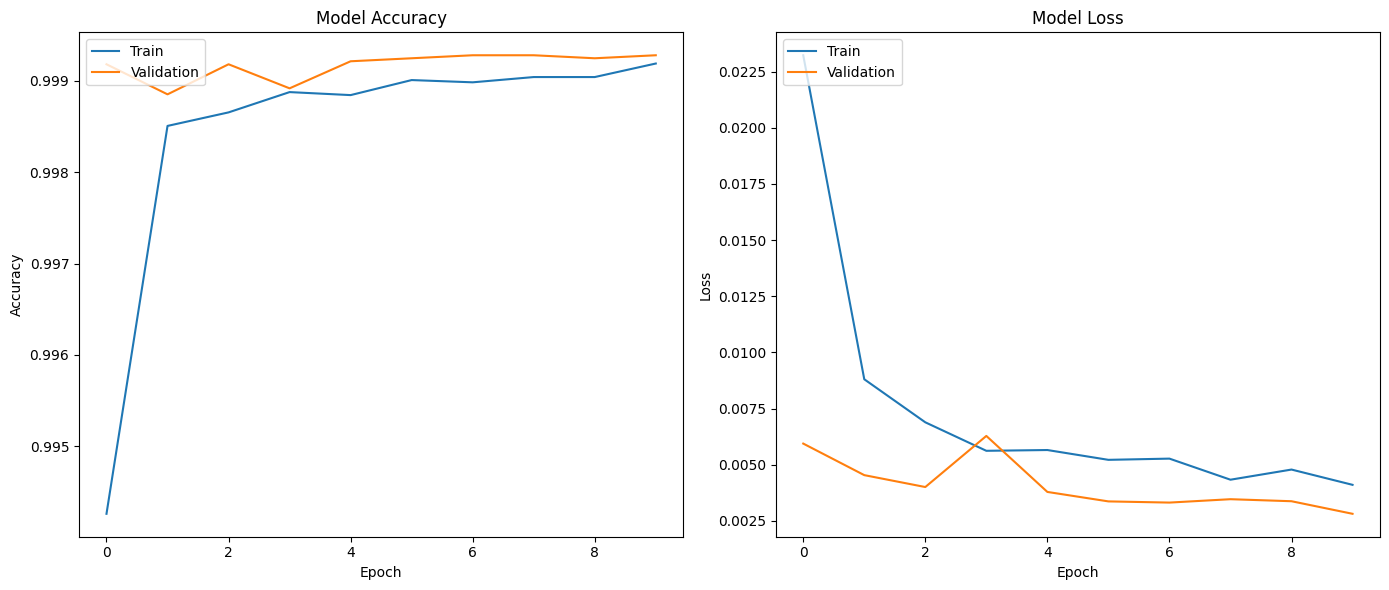

In [7]:
import matplotlib.pyplot as plt

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot training & validation accuracy
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


=================================================================================================================

ERIC TAN XIN ZHEN (ANN)

In [9]:
# This cell contains the code from ann.txt to define and train the ANN model.
# It uses the preprocessed data (X_train_scaled, y_train_balanced, X_test_scaled, y_test)
# that was generated by running the notebook from the GitHub URL.

# Code from ann.txt starts here:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Define the ANN model
# The input dimension should match the number of features in your scaled training data (X_train_scaled)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy'])

# Train the model
# Use the scaled and balanced training data
history = model.fit(X_train_scaled, y_train_balanced, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
# Use the scaled test data
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}") # Adjusted formatting to 4 decimal places

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int")

# Display classification report and confusion matrix
print("\n===================================")
print("\n--- Model Performance Summary ---")
print("\n===================================")
print(f"🎯Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}") # Print final validation accuracy
print("\n📈Classification Report:")
print(classification_report(y_test, y_pred, digits=4)) # Adjusted formatting to 4 decimal places

print("\n📊Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Add an epoch column for easier readability
history_df['epoch'] = history_df.index + 1

# Display the DataFrame
print("\nTraining History Table:")
display(history_df[['epoch', 'accuracy', 'val_accuracy', 'loss', 'val_loss']])

# Code from ann.txt ends here.

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3803/3803 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9794 - loss: 0.0557 - val_accuracy: 0.9992 - val_loss: 0.0044
Epoch 2/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 3/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9990 - loss: 0.0042 - val_accuracy: 0.9994 - val_loss: 0.0043
Epoch 4/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9990 - loss: 0.0038 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 5/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 6/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9993 - val_loss: 0.0074
Epoch 7/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 8/10
3803/3803 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9994 - loss: 0.0030 - val

,epoch,accuracy,val_accuracy,loss,val_loss
0,1,0.994584,0.999211,0.018915,0.004379
1,2,0.999047,0.999343,0.005229,0.003951
2,3,0.999030,0.999375,0.004392,0.004282
3,4,0.999104,0.999310,0.004196,0.004353
4,5,0.999252,0.999375,0.003685,0.002941
5,6,0.999129,0.999310,0.004025,0.007428
6,7,0.999244,0.999277,0.003731,0.003244
7,8,0.999351,0.999145,0.003023,0.002870
8,9,0.999260,0.999343,0.003634,0.003240
9,10,0.999219,0.999343,0.002884,0.003204


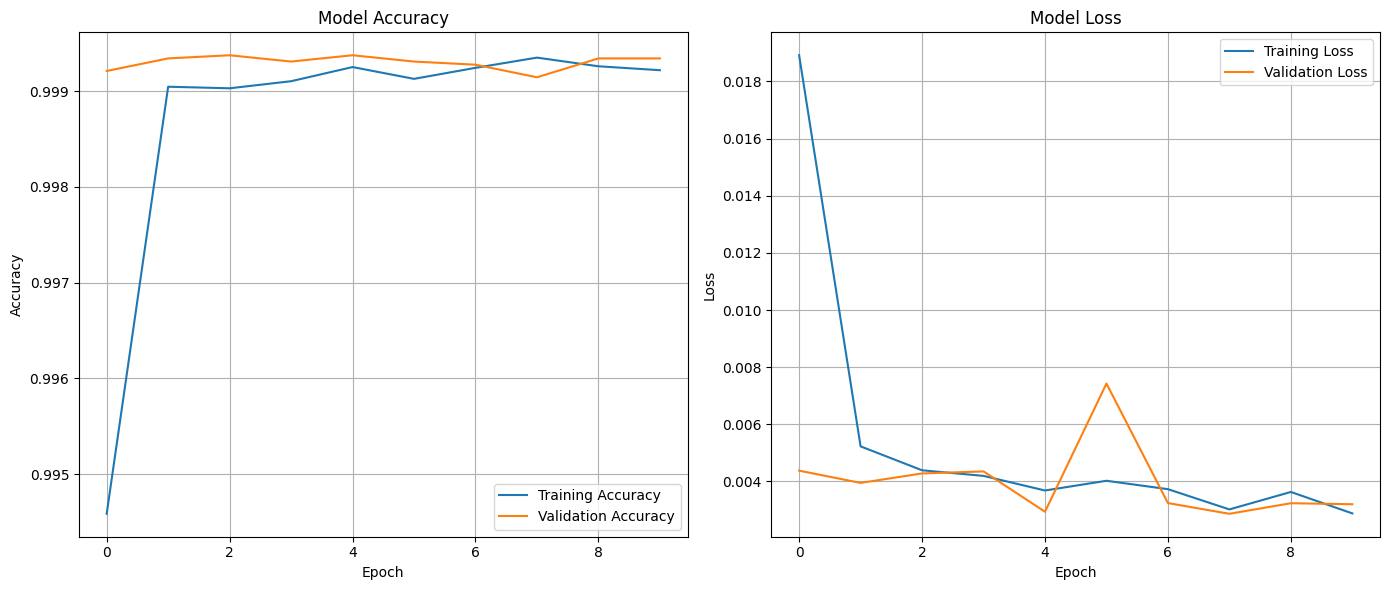

In [10]:
import matplotlib.pyplot as plt

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot training and validation accuracy
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

# Plot training and validation loss
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

# Adjust spacing
plt.tight_layout()
plt.show()


=================================================================================================================

AMOS WAI ZHAN (Decision Tree)

🌲 Training Decision Tree Classifier...
🔍 Evaluating the model...
✅ Accuracy: 0.9998
✅ Precision: 0.9998
✅ Recall: 0.9999
✅ F1 Score: 0.9998
✅ ROC-AUC: 0.9998

📊 Confusion Matrix:
[[19009     5]
 [    3 25600]]


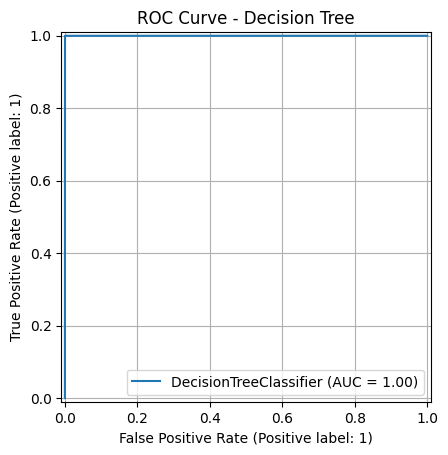


🎯 Verdict: Achieved F1 = 1.00, target met ✅


In [15]:
# ➕ Decision Tree Model

# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

# Replace these with your actual variable names if different
# X_train, X_test, y_train, y_test must already be defined from CleanedData.ipynb

# Convert labels to integers (e.g., from strings like '0' or '1')
y_train = y_train.astype(str).str.strip()  # Clean whitespace
y_train = y_train.astype(int)

y_test = y_test.astype(str).str.strip()
y_test = y_test.astype(int)


print("🌲 Training Decision Tree Classifier...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("🔍 Evaluating the model...")
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC Curve
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("ROC Curve - Decision Tree")
plt.grid(True)
plt.show()

# Final verdict
print(f"\n🎯 Verdict: Achieved F1 = {f1:.2f}, {'target met ✅' if f1 >= 0.90 else 'target not met ❌'}")

=================================================================================================================

GUI